# About the dataset

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository.
The dataset gives you information about a marketing campaign of a financial institution in which you
will have to analyze in order to find ways to look for future strategies in order to improve future 
marketing campaigns for the bank.

# Term deposit

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.
 
click on this link from Investopedia:  https://www.investopedia.com/terms/t/termdeposit.asp

# Data Variables Overview

## Input Variables

1. **age**: (numeric)

2. **job**: type of job 
   - Categories: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'

3. **marital**: marital status 
   - Categories: 'divorced', 'married', 'single', 'unknown' (Note: 'divorced' includes widowed)

4. **education**: 
   - Categories: primary, secondary, tertiary, unknown

5. **default**: has credit in default? 
   - Categories: 'no', 'yes', 'unknown'

6. **housing**: has housing loan? 
   - Categories: 'no', 'yes', 'unknown'

7. **loan**: has a personal loan? 
   - Categories: 'no', 'yes', 'unknown'

8. **balance**: Balance of the individual.

9. **month:** last contact month of the year 
   - Categories: 'jan', 'feb', 'mar', ..., 'nov', 'dec'

10. **day:** last contact day of the week 
    - Categories: 'mon', 'tue', 'wed', 'thu', 'fri'

11. **duration:** last contact duration, in seconds (numeric)
    - Important note: Benchmark purposes only; discard for a realistic predictive model if the intention is not benchmarking.

12. **contact:** contact communication type 
    - Categories: 'cellular', 'telephone'

13. **pdays:** number of days passed since the client was last contacted from a previous campaign 
    - Numeric; 999 means the client was not previously contacted

14. **previous:** number of contacts performed before this campaign and for this client 
    - Numeric

15. **poutcome:** outcome of the previous marketing campaign 
    - Categories: 'failure', 'nonexistent', 'success'

16. **campaign:** number of contacts performed during this campaign and for this client 
    - Numeric, includes last contact

## Target Variable

17. **deposit:** has the client subscribed to a term deposit? 
    - Binary: 'yes', 'no'

# Basic data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
df = pd.read_csv("bank.csv")

df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

<li>The <b>average age</b> is 41 year old, Here customer are between 18 year old to 95 year old.</li>
<li>The <b>average balance</b> is 1528, But the high Standard deviation tells that balance is widely spreded</li>

In [3]:
df.describe() #it will describe summary statistics of numerical variables

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

<li>There is <b>no null</b> values in data</li>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

<Axes: >

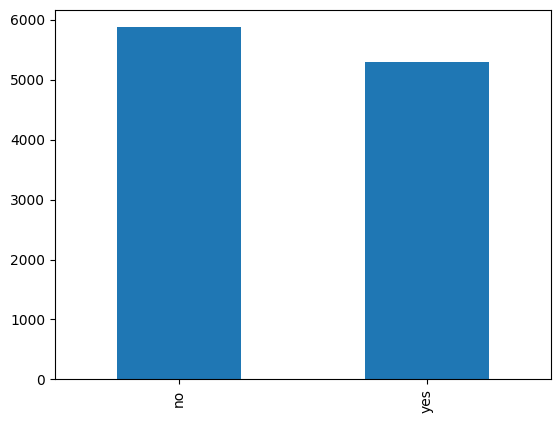

In [6]:
#Distribution of depositers and non depositers

df['deposit'].value_counts().plot(kind='bar')

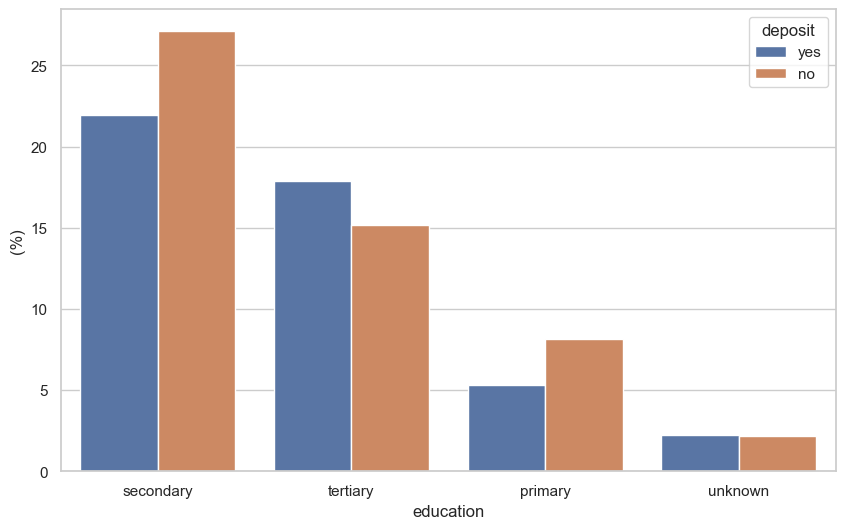

In [7]:
x = 'education'
y="balance"
hue = 'deposit'

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar-in-bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, hue=hue, data=df, estimator=lambda x: len(x) / len(df) * 100)

# Add labels and title
plt.xlabel(f"{x}")
plt.ylabel("(%)")

# Display the plot
plt.show()

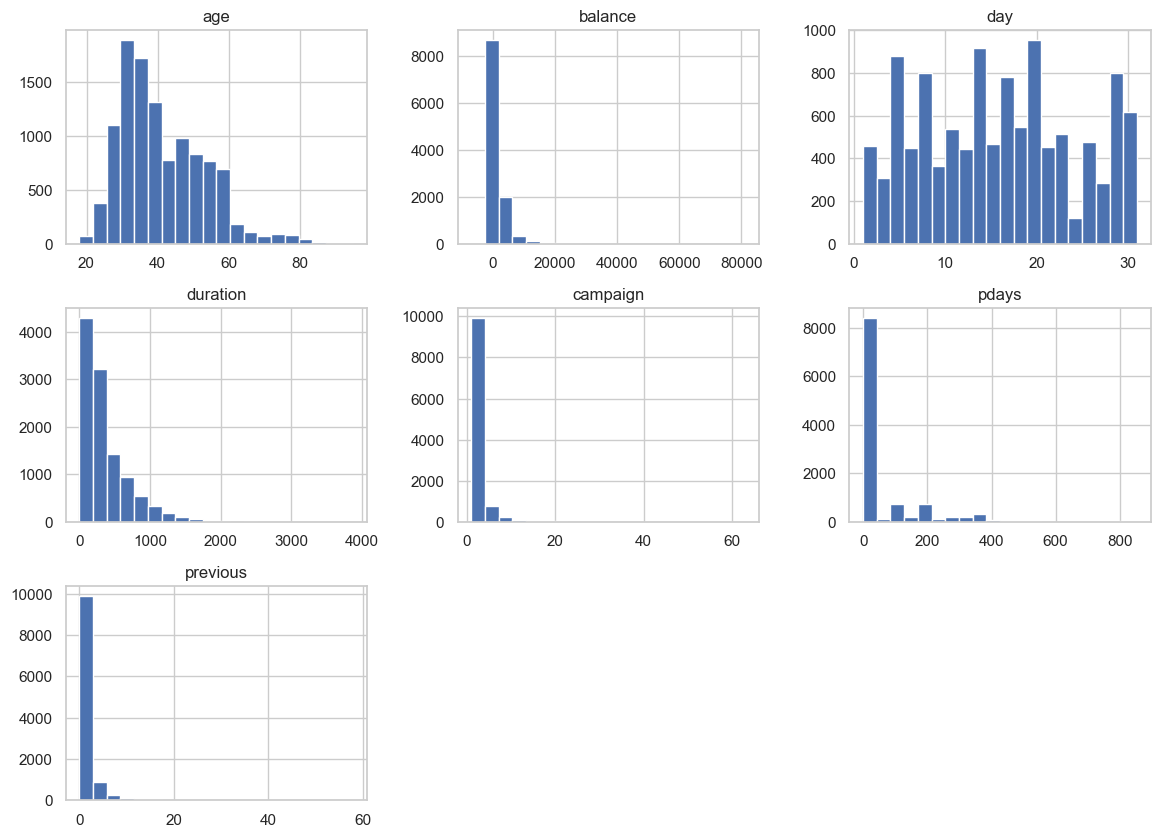

In [8]:
# Let's see how the numeric data is distributed.

df.hist(bins=20, figsize=(14,10))
plt.show()

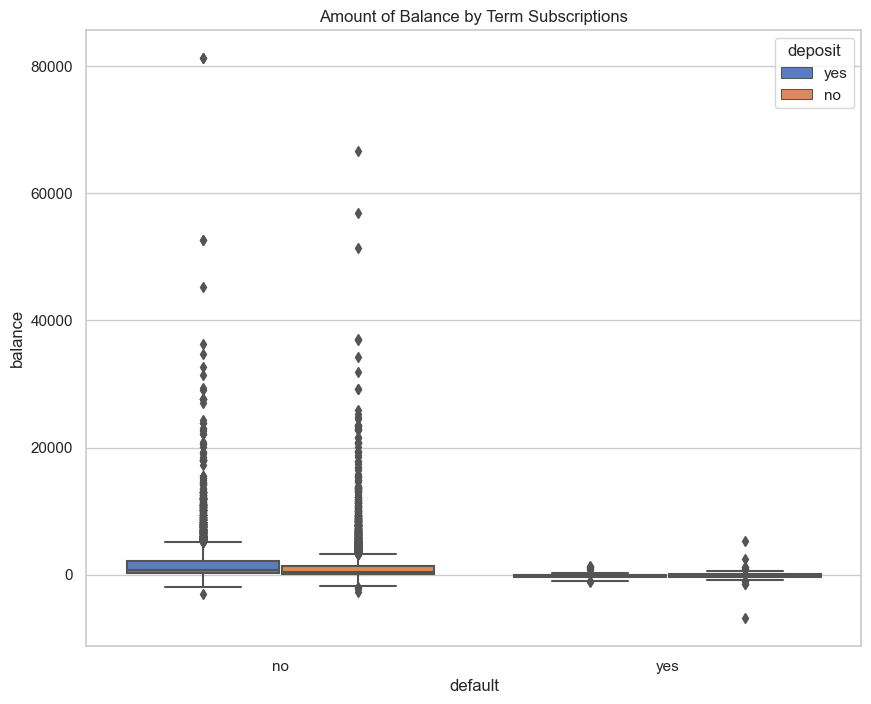

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot 1: Boxplot for balance by default and deposit
sns.boxplot(x="default", y="balance", hue="deposit", data=df, palette="muted", ax=ax1)
ax1.set_title("Amount of Balance by Term Subscriptions")

# Display the plot
plt.show()

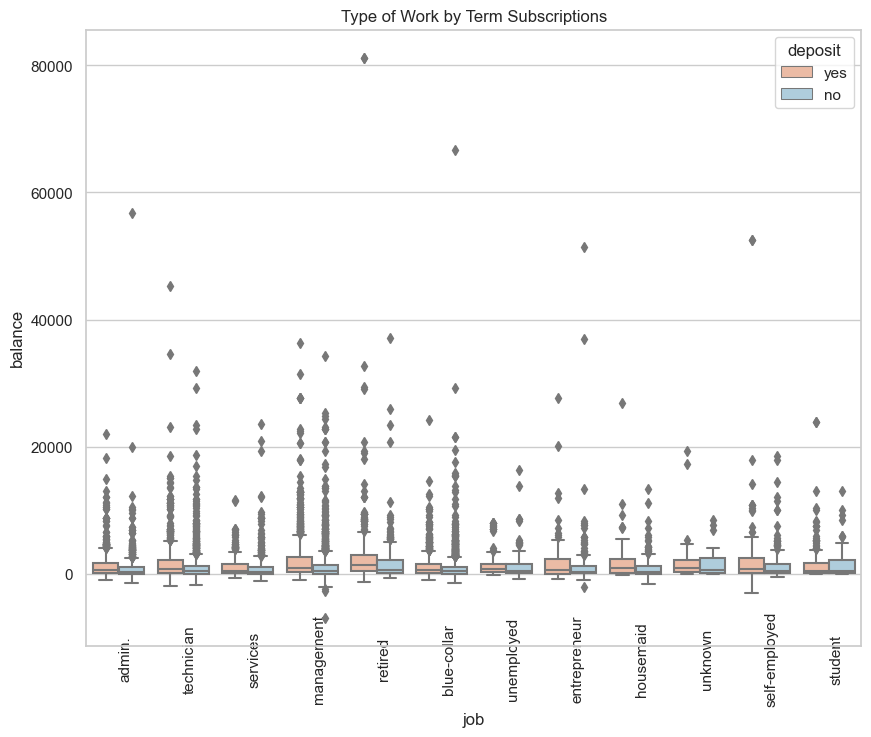

In [10]:
fig, ax2 = plt.subplots(figsize=(10, 8))

# Plot 2: Boxplot for balance by job and deposit
sns.boxplot(x="job", y="balance", hue="deposit", data=df, palette="RdBu", ax=ax2)
ax2.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
ax2.set_title("Type of Work by Term Subscriptions")

# Display the plot
plt.show()

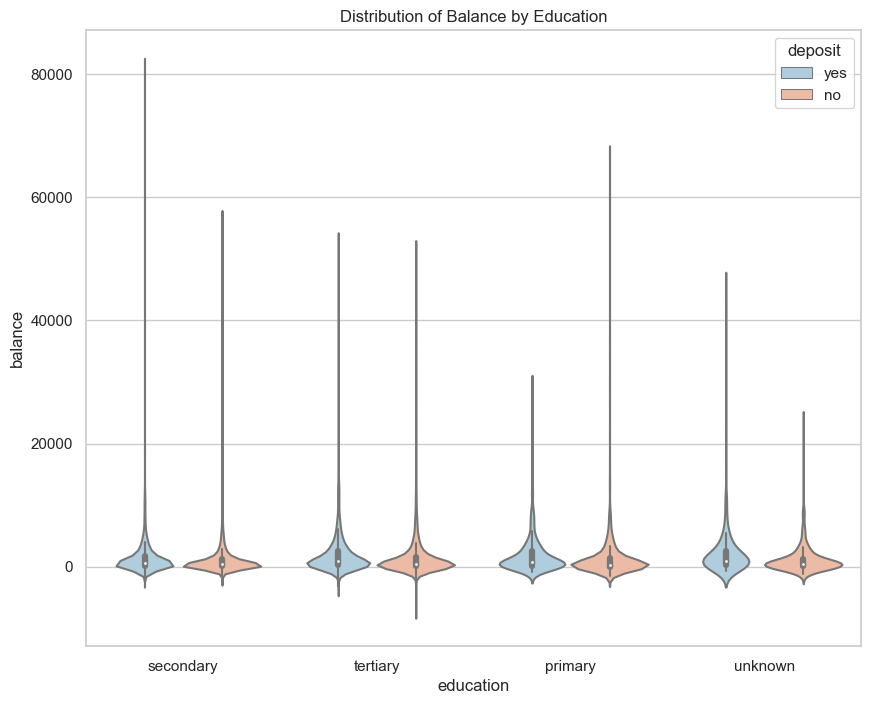

In [11]:
fig, ax3 = plt.subplots(figsize=(10, 8))

# Plot 3: Violinplot for balance by education and deposit
sns.violinplot(x="education", y="balance", hue="deposit", data=df, palette="RdBu_r", ax=ax3)
ax3.set_title("Distribution of Balance by Education")

# Display the plot
plt.show()

# Some important insights from job variable
<br>
<li>Management is the occupation that is more widespread in this dataset.</li>
<li>The retired are the ones who have the highest median age while student are the lowest.</li>
<li>Management and Retirees are the ones who have the highest balance in their accounts.</li>

In [12]:
# Drop Rows with "Unknown" Job
df = df.drop(df.loc[df["job"] == "unknown"].index)

In [13]:
# combines the "admin" job category with the "management" category
list = [df]
for i in list:
    i.loc[i['job'] == 'admin', 'job'] = "management"

In [14]:
#Treemap to show the distribution of job occupations
import squarify

# Remove Rows with Zero Balance
df = df[df['balance'] != 0]

# Get job counts
job_counts = df['job'].value_counts()

# Define treemap layout
layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)

# Create treemap
fig = go.Figure()

fig.add_trace(go.Treemap(
    labels=job_counts.index,
    parents=[''] * len(job_counts),
    values=job_counts.values,
    marker=dict(
        colorscale='Viridis',
        colorbar=dict(
            thickness=15,
            title='Job Counts',
            xanchor='left',
            titleside='right'
        )
    )
))

fig.update_layout(layout)

# Show the plot
fig.show()

In [15]:
# analyzes and visualizes the distribution of ages for different job occupations

# Filtering Subscribed Data
subscribed_df = df[df["deposit"] == "yes"]

# Get job occupations and corresponding ages
occupations = df["job"].unique().tolist()
ages_by_occupation = [subscribed_df["age"].loc[subscribed_df["job"] == job].values for job in occupations]

# Define colors for box plots
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
          'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

# Create box plot traces
box_traces = [go.Box(y=ages, name=occupation, boxpoints='all', jitter=0.5, whiskerwidth=0.2, fillcolor=color) 
              for occupation, ages, color in zip(occupations, ages_by_occupation, colors)]

# Define layout settings
layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(autorange=True, showgrid=True, zeroline=True, dtick=5, gridcolor='rgb(255, 255, 255)', 
               gridwidth=1, zerolinecolor='rgb(255, 255, 255)', zerolinewidth=2),
    margin=dict(l=40, r=30, b=80, t=100),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

# Create and display the figure
fig = go.Figure(data=box_traces, layout=layout)
fig.show()

In [16]:
# categorizes account balances into different groups and then visualizes the mean balance
# in each category for various job occupations using a polar area chart.

# Create balance categories
df["balance_status"] = pd.cut(df["balance"], bins=[-float('inf'), 0, 30000, 40000, float('inf')],
                              labels=["negative", "low", "middle", "high"])

# Get average balance by occupation and category
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean().reset_index()

# Create a simple bar chart
fig = go.Figure()

for status, color in zip(["negative", "low", "middle", "high"], ['rgb(246, 46, 46)', 'rgb(246, 97, 46)', 'rgb(246, 179, 46)', 'rgb(46, 246, 78)']):
    fig.add_trace(go.Bar(
        x=job_balance.loc[job_balance['balance_status'] == status, 'job'],
        y=job_balance.loc[job_balance['balance_status'] == status, 'balance'],
        name=status.capitalize() + " Balance",
        marker_color=color
    ))

fig.update_layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(size=12),
    legend=dict(font=dict(size=16)),
    barmode='group',
    xaxis=dict(title='Job Occupation'),
    yaxis=dict(title='Mean Balance'),
)

# Show the plot
fig.show()


<h3> Marital Status </h3><br>
In our study, we did not find much insight unless divorced individuals had lower incomes, possibly due to inheritance division. In the absence of additional insights, we will turn to grouping marital status and educational status to examine categories in the sample population

In [17]:
# Count of unique values in 'marital'
marital_counts = df['marital'].value_counts()

# Unique values in 'marital'
marital_unique_values = df['marital'].unique()

# Value counts as a list
marital_counts_list = df['marital'].value_counts().tolist()

marital_counts, marital_unique_values, marital_counts_list


(married     5815
 single      3336
 divorced    1174
 Name: marital, dtype: int64,
 array(['married', 'divorced', 'single'], dtype=object),
 [5815, 3336, 1174])

In [18]:
# Count of each marital status
marital_counts = df['marital'].value_counts().tolist()

# Labels for marital status categories
marital_labels = ['married', 'divorced', 'single']

# Create a basic bar chart
bar_chart = go.Figure(data=[go.Bar(x=marital_labels, y=marital_counts, )], 
                      layout=go.Layout(title="Count by Marital Status"))

# Display the chart
iplot(bar_chart, filename='basic-bar')

In [19]:
# Extract account balances for each marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values

# Create histograms for each marital status
single_dist = go.Histogram(x=single, histnorm='density', name='single', marker=dict(color='#6E6E6E'))
married_dist = go.Histogram(x=married, histnorm='density', name='married', marker=dict(color='#2E9AFE'))
divorced_dist = go.Histogram(x=divorced, histnorm='density', name='divorced', marker=dict(color='#FA5858'))

# Create a subplot
fig = tools.make_subplots(rows=3, print_grid=False)

# Append histograms to the subplot
fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)

# Update layout settings
fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status", height=1000, width=800)

# Display the subplot
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\Amol\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



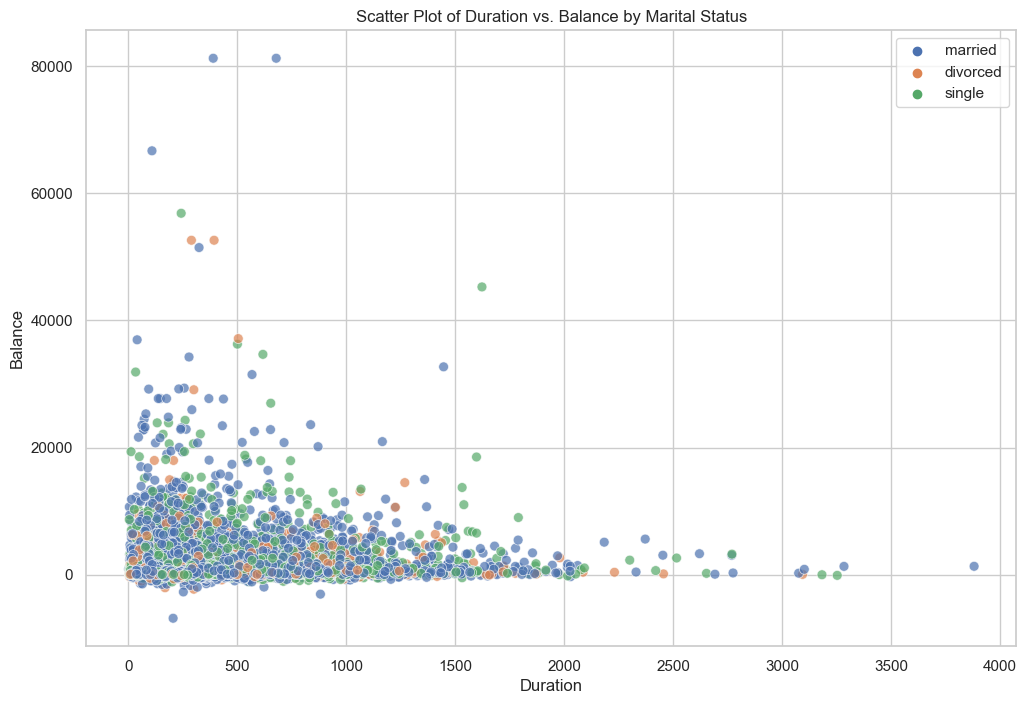

In [20]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='duration', y='balance', hue='marital', s=50, alpha=0.7)

# Set plot labels and title
plt.xlabel('Duration')
plt.ylabel('Balance')
plt.title('Scatter Plot of Duration vs. Balance by Marital Status')

# Show the legend
plt.legend()

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

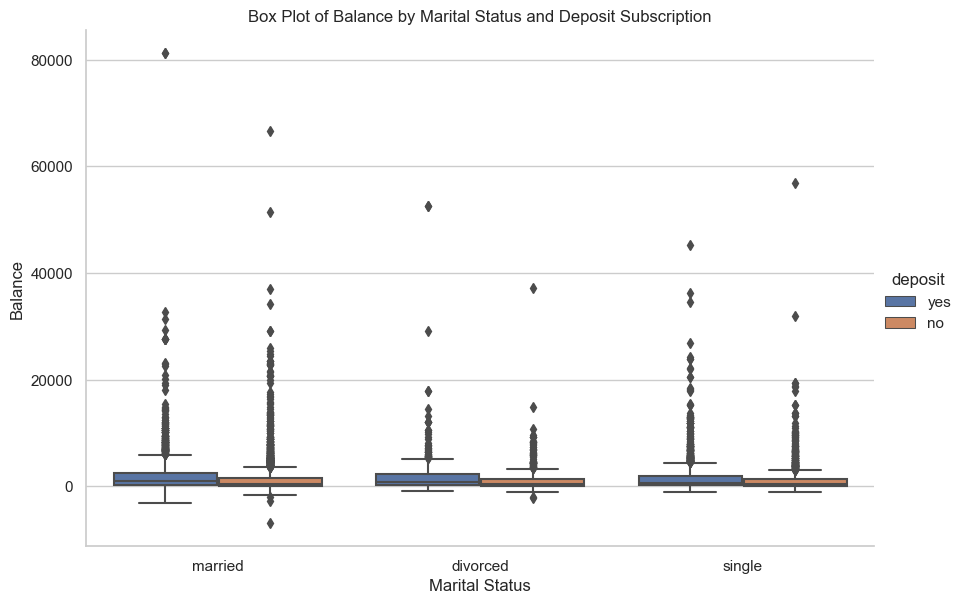

In [21]:
# Create a box plot with seaborn
plt.figure(figsize=(12, 8))
sns.catplot(x='marital', y='balance', hue='deposit', kind='box', data=df, height=6, aspect=1.5)

# Set plot labels and title
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.title('Box Plot of Balance by Marital Status and Deposit Subscription')

# Show the plot
plt.show()

<h3>Grouping People by Marriage and Education</h3><br>

<li><b>Marriage</b>: As mentioned earlier, being divorced noticeably influences the individual's account balance.</li>
<li><b>Education</b>: The person's education level also noticeably affects how much money they have.</li>
<li><b>Loans</b>: Whether someone had a loan before is another big factor in how much money they have in their account.</li>

In [22]:
#droping row thathave education in unkown
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [23]:
# Create a new column 'marital/education' by combining 'marital' and 'education'
df['marital/education'] = df.apply(lambda row: f"{row['marital']}/{row['education']}", axis=1)

In [24]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may      1042         1     -1         0  unknown     yes   
1    5   may      1467         1     -1         0  unknown     yes   
2    5   may      1389         1     -1         0  unknown     yes   
3    5   may       579         1     -1         0  unknown     yes   
4    5   may       673         2     -1         0  unknown     yes   

  balance_status  marital/education  
0            low  married/secondary  
1            low  married/secondary  
2            low  married/secondary  
3            low  married/secondary  
4            low   married/tertiary

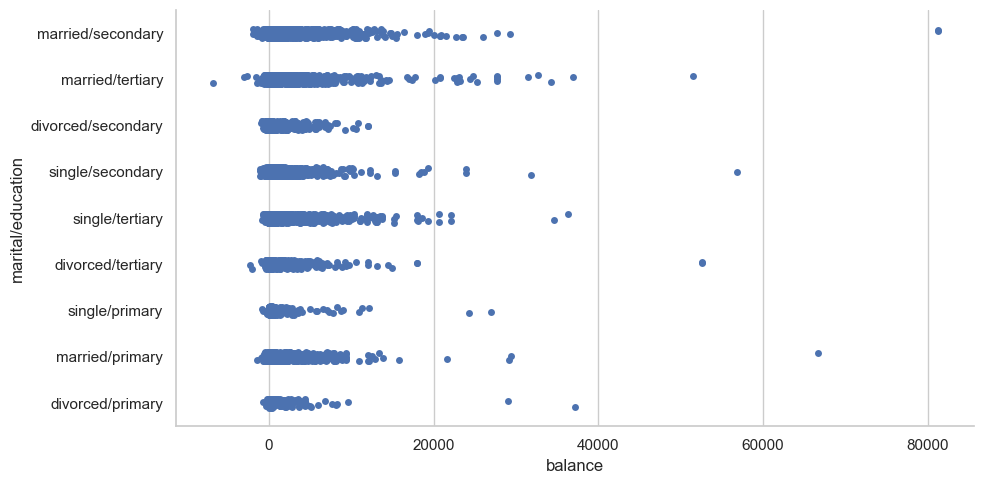

In [25]:
# Create a kernel density plot using catplot
sns.catplot(x="balance", y="marital/education", data=df, aspect=2)
plt.show()

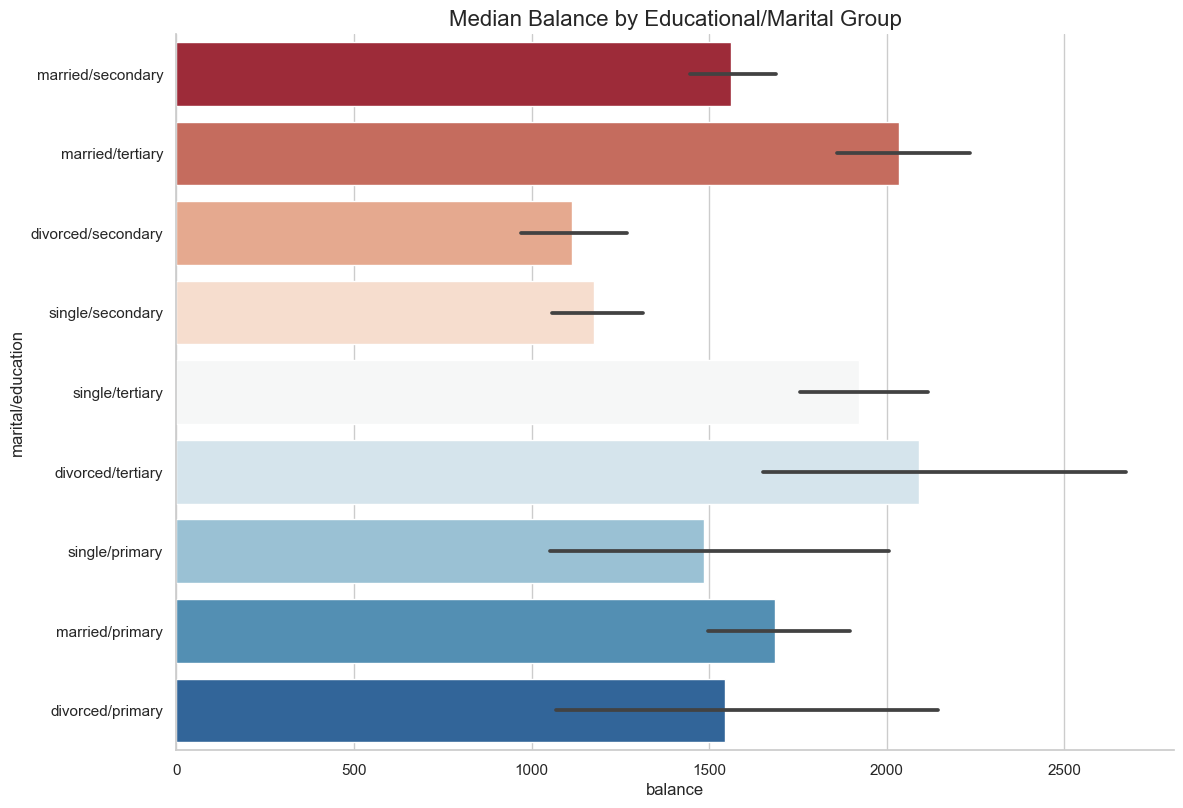

In [26]:
# Create a bar plot using catplot
sns.catplot(x="balance", y="marital/education", data=df, kind="bar", palette="RdBu", height=8, aspect=1.5)
plt.title('Median Balance by Educational/Marital Group', fontsize=16)
plt.show()

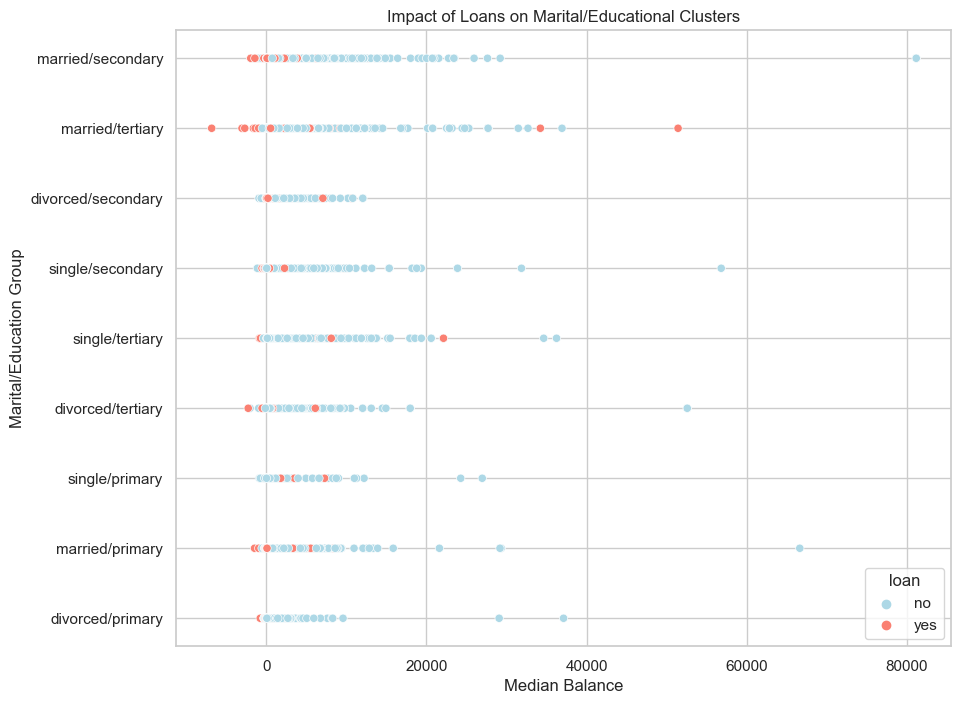

In [27]:
# Create a bar plot to show the impact of loans on marital/education clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='balance', y='marital/education', hue='loan', data=df, palette={'no': 'lightblue', 'yes': 'salmon'})
plt.title('Impact of Loans on Marital/Educational Clusters')
plt.xlabel('Median Balance')
plt.ylabel('Marital/Education Group')
plt.show()


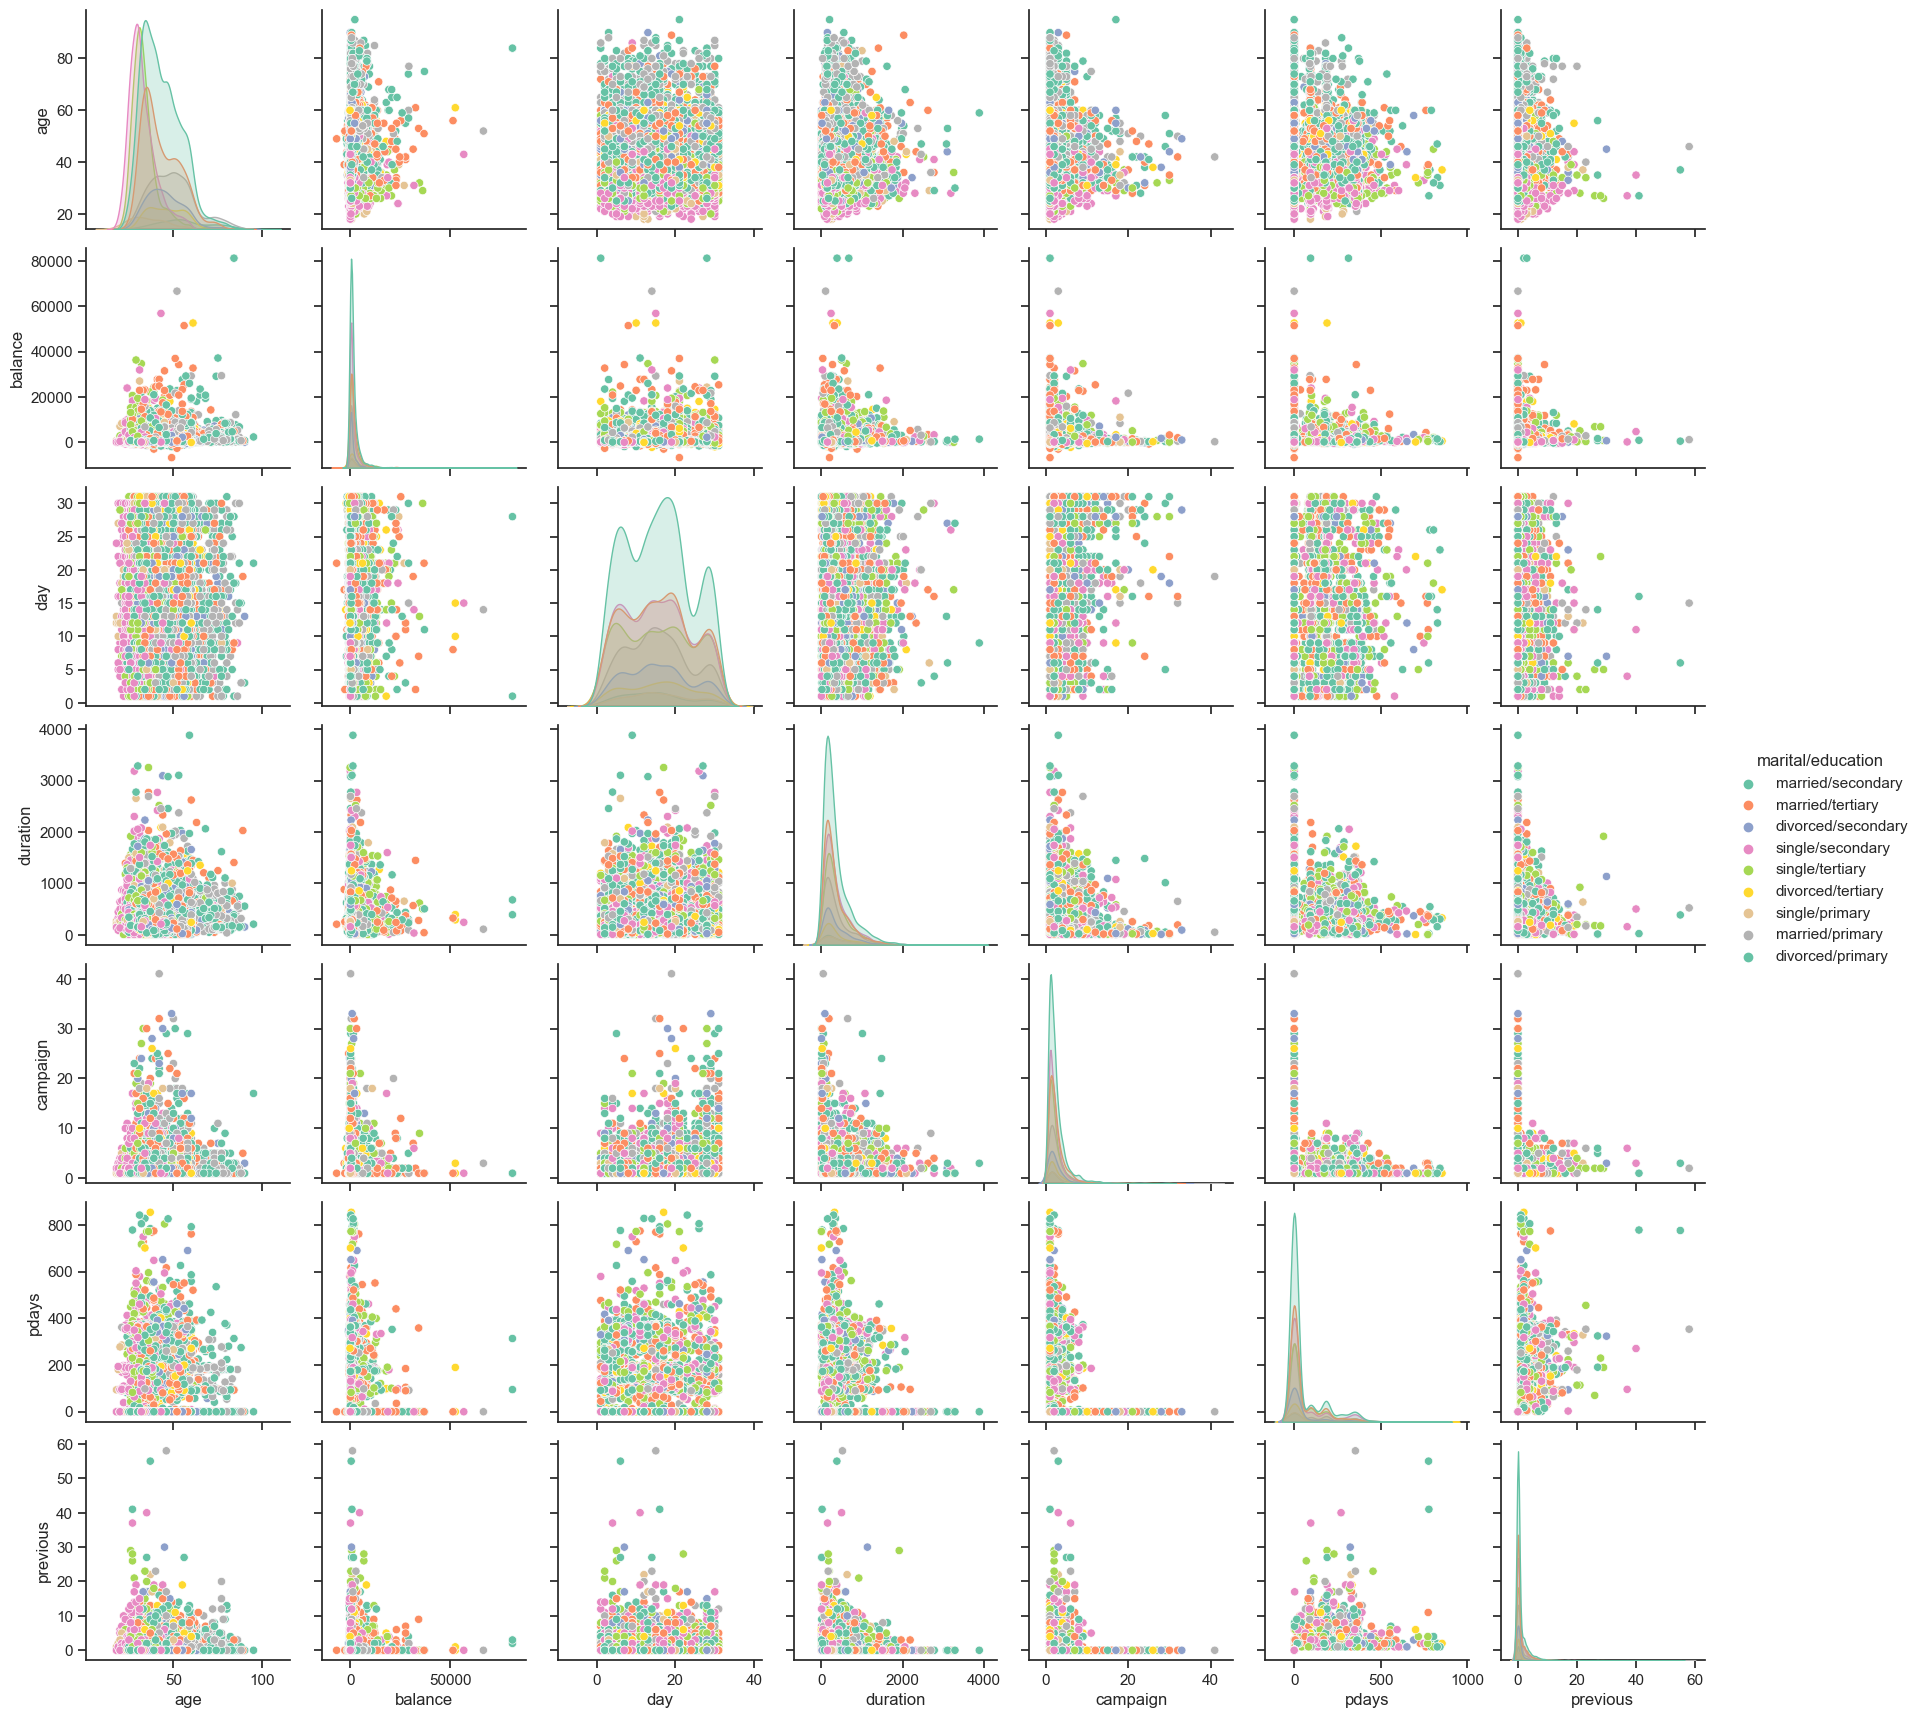

In [28]:
# Set the default aesthetic style
sns.set(style="ticks")

# Create a pair plot with hue representing marital/education groups
sns.pairplot(df, hue="marital/education", palette="Set2")
plt.show()

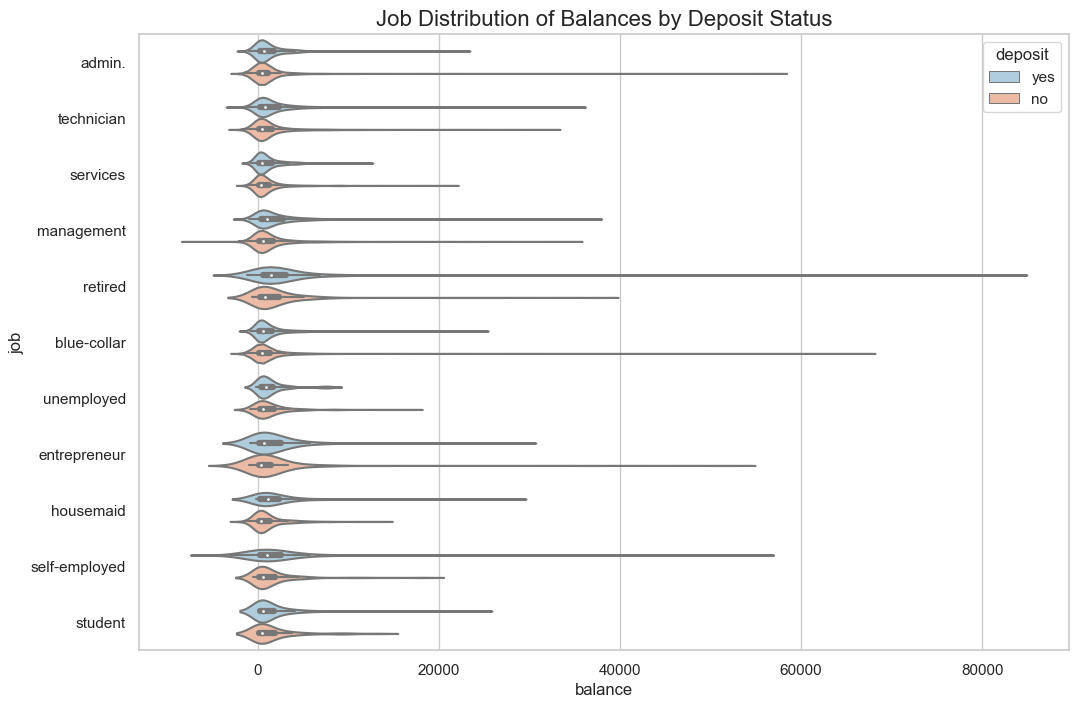

In [29]:
sns.set(style="whitegrid")

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r", data=df)

# Set the title
plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

# Show the plot
plt.show()

<h3><b>Duration and Term Deposits:</b> </h3><br>
<li> Duration shows a strong <b>correlation</b> with term deposits. Higher duration often means a higher likelihood of a client opening a term deposit. </li>
<li> The <b>average campaign duration</b> is 374.76. Let's explore if clients above this average were more inclined to open a term deposit.</li>
<li> Clients with a duration above the average were significantly more likely to open a term deposit. Approximately 78% of this group opened term deposits, while only 32% did among those below the average. This suggests that targeting individuals with above-average duration could be a successful strategy.</li>

In [30]:
#removing martial and balance from dataframe
df.drop(['marital'], axis=1, inplace=True)
df.drop(['balance'], axis=1, inplace=True)

In [31]:
df.head()

age         job  education default housing loan  contact  day month  \
0   59      admin.  secondary      no     yes   no  unknown    5   may   
1   56      admin.  secondary      no      no   no  unknown    5   may   
2   41  technician  secondary      no     yes   no  unknown    5   may   
3   55    services  secondary      no     yes   no  unknown    5   may   
4   54      admin.   tertiary      no      no   no  unknown    5   may   

   duration  campaign  pdays  previous poutcome deposit balance_status  \
0      1042         1     -1         0  unknown     yes            low   
1      1467         1     -1         0  unknown     yes            low   
2      1389         1     -1         0  unknown     yes            low   
3       579         1     -1         0  unknown     yes            low   
4       673         2     -1         0  unknown     yes            low   

   marital/education  
0  married/secondary  
1  married/secondary  
2  married/secondary  
3  married/secondary  
4   married/tertiary

C:\Users\Amol\AppData\Local\Temp\ipykernel_5576\320332796.py:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



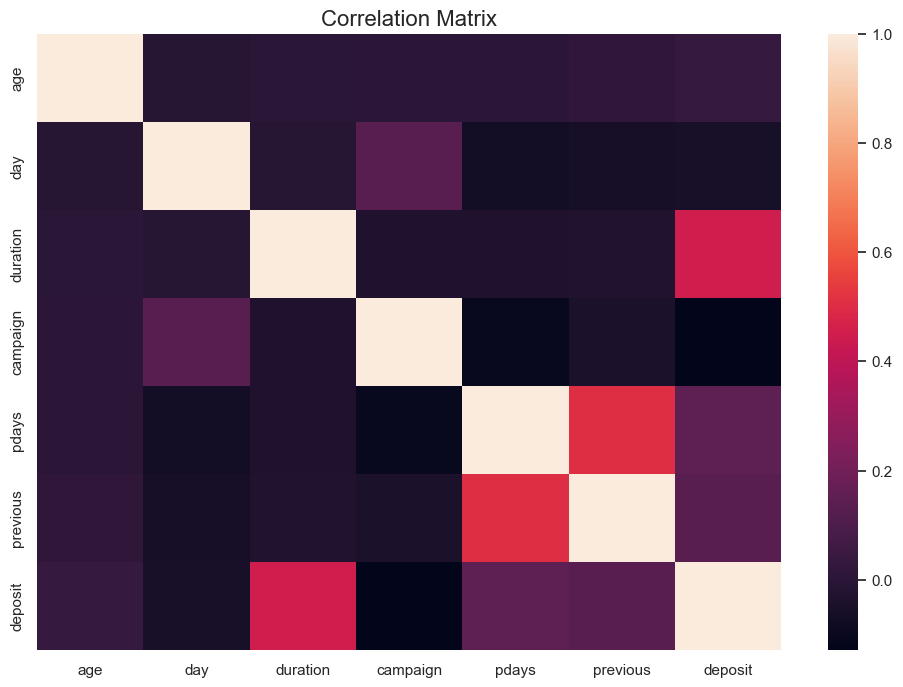

In [32]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'deposit'
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

# Separate numeric features
numeric_df = df.select_dtypes(exclude="object")

# Calculate correlation matrix
corr_numeric = numeric_df.corr()

# Plot correlation matrix heatmap
fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr_numeric, cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

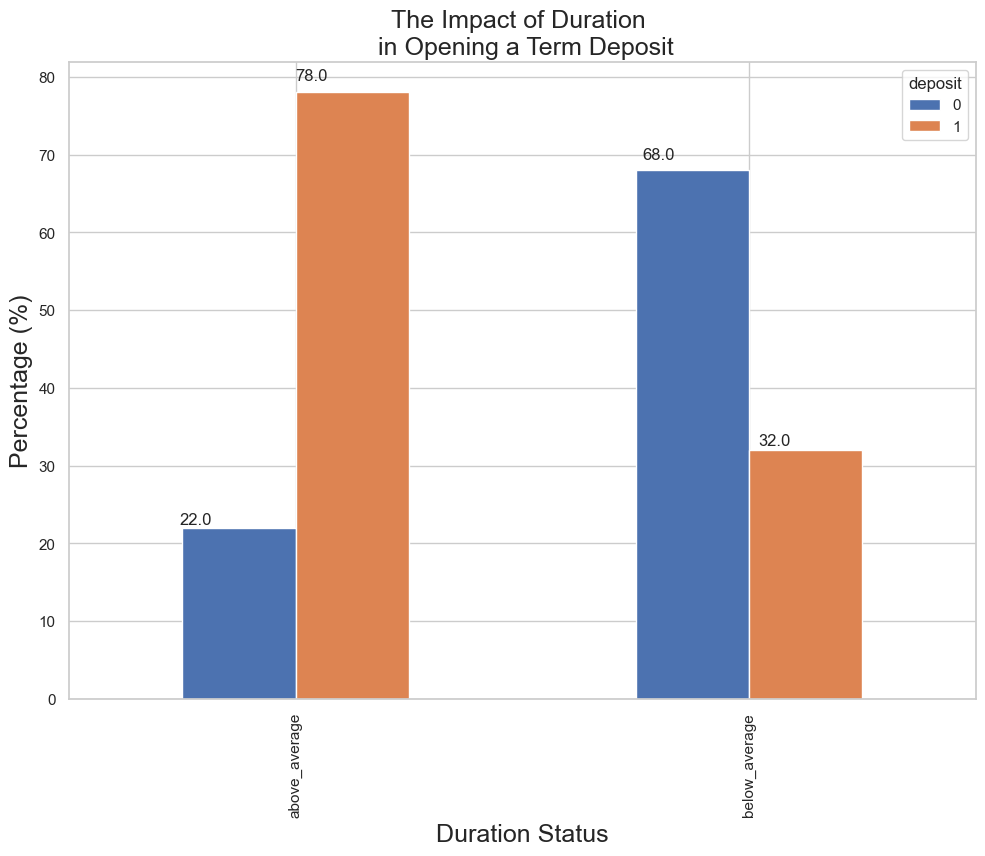

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False)
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

# Model Building